In [1]:
from mlgan.core import labeling
from shapely.geometry import Polygon

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
colormap = labeling.get_room_color_map()
del colormap['door']
del colormap['stairs']

In [3]:
REC_SIZE = 3
rectangle = Polygon([(0, 0), (0, REC_SIZE), (REC_SIZE, REC_SIZE), (REC_SIZE, 0)])
categories = list(colormap.keys())
colors = list(colormap.values())

colors_lowered = []
for _col in colors:
    row = []
    for _val in _col:
        row.append(_val / 255)
    colors_lowered.append(row)
    
legend_items = gpd.GeoDataFrame({'categories':categories,
                                 'colors': colors_lowered},
                                geometry=[rectangle]*len(colors))

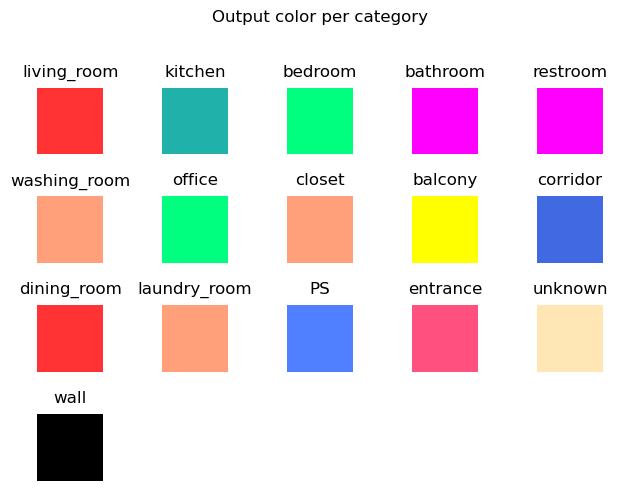

In [4]:
fig, axes = plt.subplots(nrows=int(np.ceil(legend_items.shape[0]/5)), 
                         ncols=5)
for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    if i not in legend_items.index:
        continue
    row = legend_items.loc[[i]].copy()
    row.plot(ax=ax, color=row['colors'])
    
    ax.set_title(row['categories'].values[0])

fig.suptitle('Output color per category', y=1.02)
plt.tight_layout()

In [5]:
colormap = {}
colormap['floor'] = [0, 0, 0]
colormap['entrance'] = [0, 255, 0]
colormap['window'] = [255, 0, 0]

REC_SIZE = 3
rectangle = Polygon([(0, 0), (0, REC_SIZE), (REC_SIZE, REC_SIZE), (REC_SIZE, 0)])
categories = list(colormap.keys())
colors = list(colormap.values())

colors_lowered = []
for _col in colors:
    row = []
    for _val in _col:
        row.append(_val / 255)
    colors_lowered.append(row)
    
legend_items = gpd.GeoDataFrame({'categories':categories,
                                 'colors': colors_lowered},
                                geometry=[rectangle]*len(colors))

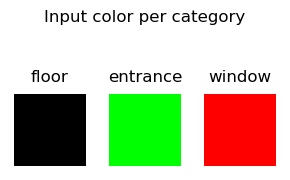

In [6]:
fig, axes = plt.subplots(nrows=1, 
                         ncols=3, figsize=(3, 3))
for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    if i not in legend_items.index:
        continue
    row = legend_items.loc[[i]].copy()
    row.plot(ax=ax, color=row['colors'])
    
    ax.set_title(row['categories'].values[0])

fig.suptitle('Input color per category', y=0.85)
plt.tight_layout()